# ML Assignment 3 - Eduardo Calzadilla

### Logistic Regression

The Iris data set file was imported as specified in the Python Machine Learning* text. Similar to the Assignment 2 - we conduct a bit of data exploration, just to refresh the attributes in the data set. 

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                  'machine-learning-databases/iris/iris.data',
                  header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
df.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

Renaming columns for clarity.

In [3]:
df.columns = ['Sepal_Length','Sepal_Width','Petal_Length',
              'Petal_Width','Species']

print(df.Species.unique())
df.head()


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 1.Selecting two features at a time

#### 1_1 Sepal Length and Sepal Width Features

In [4]:
import numpy as np
x_labels_SlSw = df.columns[0:2] #select Sepal Length and Sepal Width
# print(x_labels1)
X_SlSw = np.array(df[x_labels_SlSw].values)
X_SlSw[:5]


array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [5]:
vals, y = np.unique(df['Species'].values, return_inverse=True)

In [6]:
vals

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
from sklearn.preprocessing import scale

In [9]:
Xs_SlSw = scale(X_SlSw) #scale provides a quick way to center predictor values
#it does the same by taking in an array and centering to the mean along an axis

Xs_SlSw[:5] #preview effect of scale


array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019]])

As we can see the values for the array X have changed so we can identify the intercept. It abstractly reflects the situation which the values of the array span across the value 0 - i.e. it allows prediction of the intercept. The intercept is important as we are examining a dummy-coded predictor value based on Iris specie.

In [10]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(Xs_SlSw, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
# import matplotlib.pyplot as plt

# #matplotlib scatter funcion w/ logistic regression
# y = y.reshape(-1, 1)

# print(y.shape)
# print(Xs.shape)
# X2 = logreg.predict_proba(Xs)[:,2]
# X2 = X2.reshape(1,-1)
# print(X2.shape)

# plt.scatter(Xs, logreg.predict_proba(Xs)[:,1])
# plt.xlabel("Credit Balance")
# plt.ylabel("Probability of Default")


In [14]:
y_hat_SlSw = logreg.predict(Xs_SlSw)

accuracy_SlSw = np.mean(y_hat_SlSl == y)
accuracy_SlSw

0.17333333333333334

#### 1_2 Sepal Length and Petal Length Features

In [15]:
#Select Sepal Length and Petal Length...
#... Pick from: ['Sepal_Length','Sepal_Width','Petal_Length',
#               'Petal_Width','Species']
# SlSw = Sepal length and Sepal width
# SlPl = Sepal length and Petal length
# SlPw = Sepal length and Petal width
# SwPl = Sepal width and Petal length
# SwPw = Sepal width and Petal width
# PlPw = Petal length and Petal width

x_labels_SlPl = df[['Sepal_Length','Petal_Length']] 
# print(x_labels_SlPl)

X_SlPl = x_labels_SlPl.values
# print(X_SlPl)

Xs_SlPl = scale(X_SlPl) 
# Xs_SlPl[:5] #preview effect of scale

logreg.fit(Xs_SlPl, y)

y_hat_SlPl = logreg.predict(Xs_SlPl)

accuracy_SlPl = np.mean(y_hat_SlPl == y)
accuracy_SlPl

0.8733333333333333

#### 1_3 Sepal Length and Petal Width Features

In [16]:
#Select Sepal Length and Petal Width...
#... Pick from: ['Sepal_Length','Sepal_Width','Petal_Length',
#               'Petal_Width','Species']
# SlSw = Sepal length and Sepal width
# SlPl = Sepal length and Petal length
# SlPw = Sepal length and Petal width
# SwPl = Sepal width and Petal length
# SwPw = Sepal width and Petal width
# PlPw = Petal length and Petal width

x_labels_SlPw = df[['Sepal_Length','Petal_Width']] 
# print(x_labels_SlPl)

X_SlPw = x_labels_SlPw.values
# print(X_SlPl)

Xs_SlPw = scale(X_SlPw) 
# Xs_SlPl[:5] #preview effect of scale

logreg.fit(Xs_SlPw, y)

y_hat_SlPw = logreg.predict(Xs_SlPw)

accuracy_SlPw = np.mean(y_hat_SlPw == y)
accuracy_SlPw

0.8866666666666667

#### 1_4 Sepal Width and Petal Length

In [17]:
#Select Sepal Width and Petal Length...
#... Pick from: ['Sepal_Length','Sepal_Width','Petal_Length',
#               'Petal_Width','Species']
# SlSw = Sepal length and Sepal width
# SlPl = Sepal length and Petal length
# SlPw = Sepal length and Petal width
# SwPl = Sepal width and Petal length
# SwPw = Sepal width and Petal width
# PlPw = Petal length and Petal width

x_labels_SwPl = df[['Sepal_Width','Petal_Length']] 
# print(x_labels_SlPl)

X_SwPl = x_labels_SwPl.values
# print(X_SlPl)

Xs_SwPl = scale(X_SwPl) 
# Xs_SlPl[:5] #preview effect of scale

logreg.fit(Xs_SwPl, y)

y_hat_SwPl = logreg.predict(Xs_SwPl)

accuracy_SwPl = np.mean(y_hat_SwPl == y)
accuracy_SwPl

0.86

#### 1_5 Sepal Width and Petal Width

In [18]:
#Select Sepal Width and Petal Width...
#... Pick from: ['Sepal_Length','Sepal_Width','Petal_Length',
#               'Petal_Width','Species']
# SlSw = Sepal length and Sepal width
# SlPl = Sepal length and Petal length
# SlPw = Sepal length and Petal width
# SwPl = Sepal width and Petal length
# SwPw = Sepal width and Petal width
# PlPw = Petal length and Petal width

x_labels_SwPw = df[['Sepal_Width','Petal_Width']] 
# print(x_labels_SlPl)

X_SwPw = x_labels_SwPw.values
# print(X_SlPl)

Xs_SwPw = scale(X_SwPw) 
# Xs_SlPl[:5] #preview effect of scale

logreg.fit(Xs_SwPw, y)

y_hat_SwPw = logreg.predict(Xs_SwPw)

accuracy_SwPw = np.mean(y_hat_SwPw == y)
accuracy_SwPw

0.8933333333333333

#### 1_6 Petal Length and Petal Width

In [19]:
#Select Sepal Width and Petal Width...
#... Pick from: ['Sepal_Length','Sepal_Width','Petal_Length',
#               'Petal_Width','Species']
# SlSw = Sepal length and Sepal width
# SlPl = Sepal length and Petal length
# SlPw = Sepal length and Petal width
# SwPl = Sepal width and Petal length
# SwPw = Sepal width and Petal width
# PlPw = Petal length and Petal width

x_labels_PlPw = df[['Petal_Length','Petal_Width']] 
# print(x_labels_SlPl)

X_PlPw= x_labels_PlPw.values
# print(X_SlPl)

Xs_PlPw = scale(X_PlPw) 
# Xs_SlPl[:5] #preview effect of scale

logreg.fit(Xs_PlPw, y)

y_hat_PlPw = logreg.predict(Xs_PlPw)

accuracy_PlPw = np.mean(y_hat_PlPw == y)
accuracy_PlPw

0.94

# 2.Selecting three features at a time

#### 2_1 Sepal Length, Sepal Width and Petal Length Features

In [20]:
#Select Sepal Width and Petal Width...
#... Pick from: ['Sepal_Length','Sepal_Width','Petal_Length',
#               'Petal_Width','Species']
# Sl_SwPl= Sepal length, Sepal Width and Petal Length 
# Sl_SwPw= Sepal length, Sepal Width and Petal Width
# Sl_PlPw= Sepal length, Petal Length and Petal Width
# Sw_PlPw= Sepal width, Petal Length and Petal Width


x_labels_Sl_SwPl = df[['Sepal_Length', 'Sepal_Width', 'Petal_Length']] 
# print(x_labels_SlPl)

X_Sl_SwPl= x_labels_Sl_SwPl.values
# print(X_SlPl)

Xs_Sl_SwPl = scale(X_Sl_SwPl) 
# Xs_SlPl[:5] #preview effect of scale

logreg.fit(Xs_Sl_SwPl, y)

y_hat_Sl_SwPl = logreg.predict(Xs_Sl_SwPl)

accuracy_Sl_SwPl = np.mean(y_hat_Sl_SwPl == y)
accuracy_Sl_SwPl

0.8733333333333333

#### 2_2 Sepal Length, Sepal Width and Petal Width Features

In [21]:
#Select Sepal Width and Petal Width...
#... Pick from: ['Sepal_Length','Sepal_Width','Petal_Length',
#               'Petal_Width','Species']
# Sl_SwPl= Sepal length, Sepal Width and Petal Length 
# Sl_SwPw= Sepal length, Sepal Width and Petal Width
# Sl_PlPw= Sepal length, Petal Length and Petal Width
# Sw_PlPw= Sepal width, Petal Length and Petal Width


x_labels_Sl_SwPw = df[['Sepal_Length', 'Sepal_Width', 'Petal_Width']] 
# print(x_labels_SlPl)

X_Sl_SwPw= x_labels_Sl_SwPw.values
# print(X_SlPl)

Xs_Sl_SwPw = scale(X_Sl_SwPw) 
# Xs_SlPl[:5] #preview effect of scale

logreg.fit(Xs_Sl_SwPw, y)

y_hat_Sl_SwPw = logreg.predict(Xs_Sl_SwPw)

accuracy_Sl_SwPw = np.mean(y_hat_Sl_SwPw == y)
accuracy_Sl_SwPw

0.9066666666666666

#### 2_3 Sepal Length, Petal Length and Petal Width Features

In [22]:
#Select Sepal Width and Petal Width...
#... Pick from: ['Sepal_Length','Sepal_Width','Petal_Length',
#               'Petal_Width','Species']
# Sl_SwPl= Sepal length, Sepal Width and Petal Length 
# Sl_SwPw= Sepal length, Sepal Width and Petal Width
# Sl_PlPw= Sepal length, Petal Length and Petal Width
# Sw_PlPw= Sepal width, Petal Length and Petal Width


x_labels_Sl_PlPw = df[['Sepal_Length', 'Petal_Length', 'Petal_Width']] 
# print(x_labels_SlPl)

X_Sl_PlPw= x_labels_Sl_PlPw.values
# print(X_SlPl)

Xs_Sl_PlPw = scale(X_Sl_PlPw) 
# Xs_SlPl[:5] #preview effect of scale

logreg.fit(Xs_Sl_PlPw, y)

y_hat_Sl_PlPw = logreg.predict(Xs_Sl_PlPw)

accuracy_Sl_PlPw = np.mean(y_hat_Sl_PlPw == y)
accuracy_Sl_PlPw

0.9133333333333333

#### 2_4 Sepal Width, Petal Length and Petal Width Features

In [23]:
#Select Sepal Width and Petal Width...
#... Pick from: ['Sepal_Length','Sepal_Width','Petal_Length',
#               'Petal_Width','Species']
# Sl_SwPl= Sepal length, Sepal Width and Petal Length 
# Sl_SwPw= Sepal length, Sepal Width and Petal Width
# Sl_PlPw= Sepal length, Petal Length and Petal Width
# Sw_PlPw= Sepal width, Petal Length and Petal Width


x_labels_Sw_PlPw = df[['Sepal_Width', 'Petal_Length', 'Petal_Width']] 
# print(x_labels_SlPl)

X_Sw_PlPw= x_labels_Sw_PlPw.values
# print(X_SlPl)

Xs_Sw_PlPw = scale(X_Sw_PlPw) 
# Xs_SlPl[:5] #preview effect of scale

logreg.fit(Xs_Sw_PlPw, y)

y_hat_Sw_PlPw = logreg.predict(Xs_Sw_PlPw)

accuracy_Sw_PlPw = np.mean(y_hat_Sw_PlPw == y)
accuracy_Sw_PlPw

0.92

# 3.Selecting all features

In [24]:
#Select Sepal Width and Petal Width...
#... Pick from: ['Sepal_Length','Sepal_Width','Petal_Length',
#               'Petal_Width','Species']


x_labels_4 = df[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']] 
# print(x_labels_SlPl)

X_4= x_labels_4.values
# print(X_SlPl)

Xs_4 = scale(X_4) 
# Xs_SlPl[:5] #preview effect of scale

logreg.fit(Xs_4, y)

y_hat_4 = logreg.predict(Xs_4)

accuracy_4 = np.mean(y_hat_4 == y)
accuracy_4

0.9266666666666666

# 4.Summarizing Results

In [25]:
# imp ort operator

acc_dict = {'accuracy_SlSw':accuracy_SlSw, 'accuracy_SlPl':accuracy_SlPl
            , 'accuracy_SlPw':accuracy_SlPw, 'accuracy_SwPl':accuracy_SwPl
            , 'accuracy_SwPw':accuracy_SwPw, 'accuracy_PlPw':accuracy_PlPw
            , 'accuracy_Sl_SwPl':accuracy_Sl_SwPl, 'accuracy_Sl_SwPw':accuracy_Sl_SwPw
            , 'accuracy_Sl_PlPw':accuracy_Sl_PlPw, 'accuracy_Sw_PlPw':accuracy_Sw_PlPw
            , 'accuracy_4':accuracy_4}

# print(acc_dict)

for k, v in acc_dict.items():
#     print(v)
    num = v
    print ("{:<20} {:<10}".format(k, float(str(num)[:6])))

max_value = max(acc_dict.values())  # maximum value
max_keys = [k for k, v in acc_dict.items() if v == max_value] # getting all keys containing the `maximum`

# print(acc_dict)
print(max_keys, max_value)


accuracy_SlSw        0.1733    
accuracy_SlPl        0.8733    
accuracy_SlPw        0.8866    
accuracy_SwPl        0.86      
accuracy_SwPw        0.8933    
accuracy_PlPw        0.94      
accuracy_Sl_SwPl     0.8733    
accuracy_Sl_SwPw     0.9066    
accuracy_Sl_PlPw     0.9133    
accuracy_Sw_PlPw     0.92      
accuracy_4           0.9266    
['accuracy_PlPw'] 0.94


The maximum accuracy is found using two features (petal length and petal width). 

### 4_1 Varying between L1/L2 and changing regularization parameter

<StemContainer object of 3 artists>

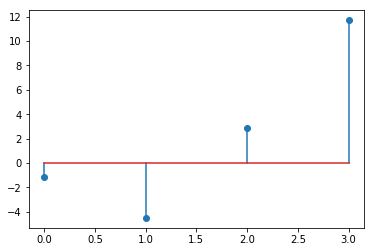

In [29]:
# For plotting in the Jupyter Notebook environment as an inline output
%matplotlib inline
import matplotlib.pyplot as plt

# We create a matrix with all the labels
x_labels_PlPw = df.columns[:-1]
Xw_PlPw = np.array(df[x_labels_PlPw].values)
# print(Xw_PlPw)

# print(Xw_PlPw)
# print(X_PlPw)
# print("The matrix dimensions of Xw is " + str(Xw_PlPw.shape))
# print(X_PlPw.shape)


# List of X:
# X_SlSw        
# X_SlPl        
# X_SlPw        
# X_SwPl        
# X_SwPw        
# X_PlPw        
# X_Sl_SwPl     
# X_Sl_SwPw     
# X_Sl_PlPw     
# X_Sw_PlPw     
# X_4 
# By default, LogisticRegression() is set on penalty as L2 and C=1.
# For no regularization:
logreg_w=LogisticRegression(C=1e10)

#Using X_PlPW for Petal Length and Petal Width
# print(logreg_w.fit(X_PlPw,y))
# WX_PlPw=logreg_w.coef_
# print(WX_PlPw)

logreg_w.fit(Xw_PlPw,y)
WX_PlPw=logreg_w.coef_
# print(WX_PlPw)

W=np.sum(WX_PlPw, axis = 0)
# print(W)
plt.stem(W)

In [30]:
idx1=np.argsort(np.abs(W))[-1]
# print(np.abs(W))
idx2=np.argsort(np.abs(W))[-2]
# print(idx2)
# idx3=np.argsort(np.abs(W))[-3]
# print(idx3)

#Which are the top two features based on weight
heavy=[x_labels_PlPw[idx1], x_labels_PlPw[idx2]]
heavy

['Petal_Width', 'Sepal_Width']

##### a) Changing from L2 to L1

['Petal_Length', 'Sepal_Width']

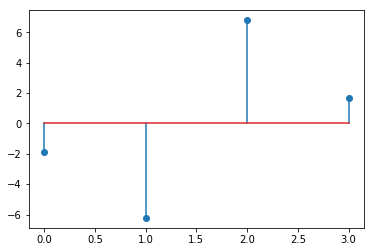

In [31]:
# We create a matrix with all the labels (exc Species)...
# ... again using highest accuracy Petal Length and Width
# x_labels_PlPw = df.columns[:-1]
# Xw_PlPw = np.array(df[x_labels_PlPw].values)

logreg_w_L1=LogisticRegression(C=1e10, penalty='l1')

logreg_w_L1.fit(Xw_PlPw,y)
WX_PlPw_L1=logreg_w_L1.coef_
# print(WX_PlPw)

W_L1=np.sum(WX_PlPw_L1, axis = 0)
# print(W)
plt.stem(W_L1)

idx1=np.argsort(np.abs(W_L1))[-1]
# print(np.abs(W))
idx2=np.argsort(np.abs(W_L1))[-2]
# print(idx2)
# idx3=np.argsort(np.abs(W))[-3]
# print(idx3)

#Which are the top two features based on weight
heavy=[x_labels_PlPw[idx1], x_labels_PlPw[idx2]]
heavy

We can see that the highest weight is now allocated to Petal Length.

##### b) Changing Parameter C

['Petal_Length', 'Sepal_Width']

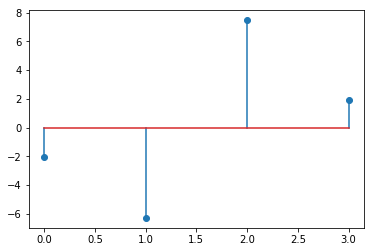

In [267]:
# We create a matrix with all the labels (exc Species)...
# ... again using highest accuracy Petal Length and Width
# x_labels_PlPw = df.columns[:-1]
# Xw_PlPw = np.array(df[x_labels_PlPw].values)

logreg_w_L1c2=LogisticRegression(C=1000, penalty='l1')

logreg_w_L1c2.fit(Xw_PlPw,y)
WX_PlPw_L1c2=logreg_w_L1c2.coef_
# print(WX_PlPw)

W_L1c2=np.sum(WX_PlPw_L1c2, axis = 0)
# print(W)
plt.stem(W_L1c2)

idx1=np.argsort(np.abs(W_L1c2))[-1]
# print(np.abs(W))
idx2=np.argsort(np.abs(W_L1c2))[-2]
# print(idx2)
# idx3=np.argsort(np.abs(W))[-3]
# print(idx3)

#Which are the top two features based on weight
heavy=[x_labels_PlPw[idx1], x_labels_PlPw[idx2]]
heavy

Here we can see the weights values increase for positive weights and the features with the stringest weights remain the same.

##### c) Further min Parameter C value - increasing regularization

['Petal_Width', 'Sepal_Width']

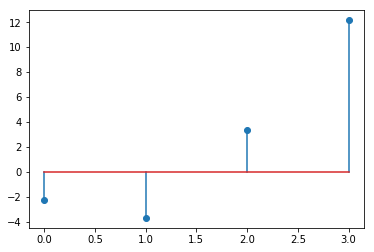

In [269]:
# We create a matrix with all the labels (exc Species)...
# ... again using highest accuracy Petal Length and Width
# x_labels_PlPw = df.columns[:-1]
# Xw_PlPw = np.array(df[x_labels_PlPw].values)

logreg_w_L1c3=LogisticRegression(C=10, penalty='l1')

logreg_w_L1c3.fit(Xw_PlPw,y)
WX_PlPw_L1c3=logreg_w_L1c3.coef_
# print(WX_PlPw)

W_L1c3=np.sum(WX_PlPw_L1c3, axis = 0)
# print(W)
plt.stem(W_L1c3)

idx1=np.argsort(np.abs(W_L1c3))[-1]
# print(np.abs(W))
idx2=np.argsort(np.abs(W_L1c3))[-2]
# print(idx2)
# idx3=np.argsort(np.abs(W))[-3]
# print(idx3)

#Which are the top two features based on weight
heavy=[x_labels_PlPw[idx1], x_labels_PlPw[idx2]]
heavy

['Petal_Width', 'Sepal_Length']

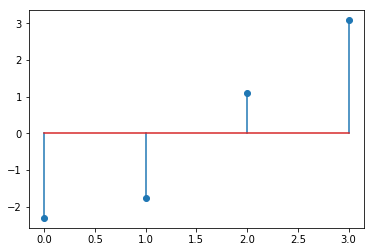

In [271]:
logreg_w_L1c4=LogisticRegression(C=1, penalty='l1')

logreg_w_L1c4.fit(Xw_PlPw,y)
WX_PlPw_L1c4=logreg_w_L1c4.coef_

W_L1c4=np.sum(WX_PlPw_L1c4, axis = 0)
plt.stem(W_L1c4)

idx1=np.argsort(np.abs(W_L1c4))[-1]
idx2=np.argsort(np.abs(W_L1c4))[-2]


#Which are the top two features based on weight
heavy=[x_labels_PlPw[idx1], x_labels_PlPw[idx2]]
heavy

['Sepal_Length', 'Sepal_Width']

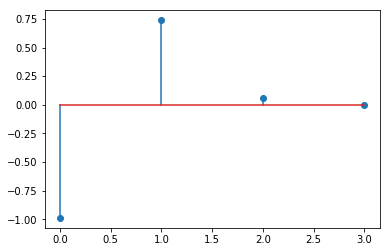

In [273]:
logreg_w_L1c5=LogisticRegression(C=0.1, penalty='l1')

logreg_w_L1c5.fit(Xw_PlPw,y)
WX_PlPw_L1c5=logreg_w_L1c5.coef_

W_L1c5=np.sum(WX_PlPw_L1c5, axis = 0)
plt.stem(W_L1c5)

idx1=np.argsort(np.abs(W_L1c5))[-1]
idx2=np.argsort(np.abs(W_L1c5))[-2]


#Which are the top two features based on weight
heavy=[x_labels_PlPw[idx1], x_labels_PlPw[idx2]]
heavy

Here we see that the weight destribution can vary wildly, the further the regularization parameter is strengthened the more skewed it becomes from our original interpretation. When comparing to the centered mean, there is a relatively small amount of variance. when comparing 2 out of the 3 classes, thus some regularization should be applied but not too strongly as this could increase bias. A regulzatization of value of around C = 1000 seems appropriate for this dataset.